# Multi-class Classification using Convolutional Neural Networks

Keras is used as a framework for the convolutional model.

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
### imports ###
import numpy as np
from load_quilt_data import load_data
import clustering_utils as cl
from sklearn.metrics.pairwise import euclidean_distances
import network
from read_data import readHDF
from load_quilt_data import load_data
from visualise_data import plot_confusion_matrix, plot_wrongs
from pylab import *
from keras.optimizers import Adam, SGD
from keras.models import load_model
from preprocessing import normalise_data, fit_input_data

Using TensorFlow backend.


### Get sequence data 

In [4]:
node = 'videos'
typ = 'sequences'

X_origin, Y1_origin, Y2_origin, meta_origin = load_data(node, typ)

### Excerpt of cluster with motorcycle as an example

In [114]:
sample = 50 # sample 0 or 20 as positive example and sample 10 as negative example
x = X_origin[sample]

### Set the parameters for the clustering

For the bandwidth parameter 450 ms were chosen. If the clustering is to be done on the y axis, you can use a bandwidth of b = 2.


In [6]:
b = 250

### Perform clustering and plot the sensor data

The data is plotted accordingly:
+ x: time in ms
+ y: segment in 1/3m
+ subplot top: sensor strip 0
+ subplot bottom: sensor strip 1
+ filled data points: push
+ unfilled data points: release of sensor
+ colors according to cluster

#### Vertical clusters top and bottom for the two drive throughs

C:\Users\Lisa\Anaconda3\envs\parkhere_ML\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


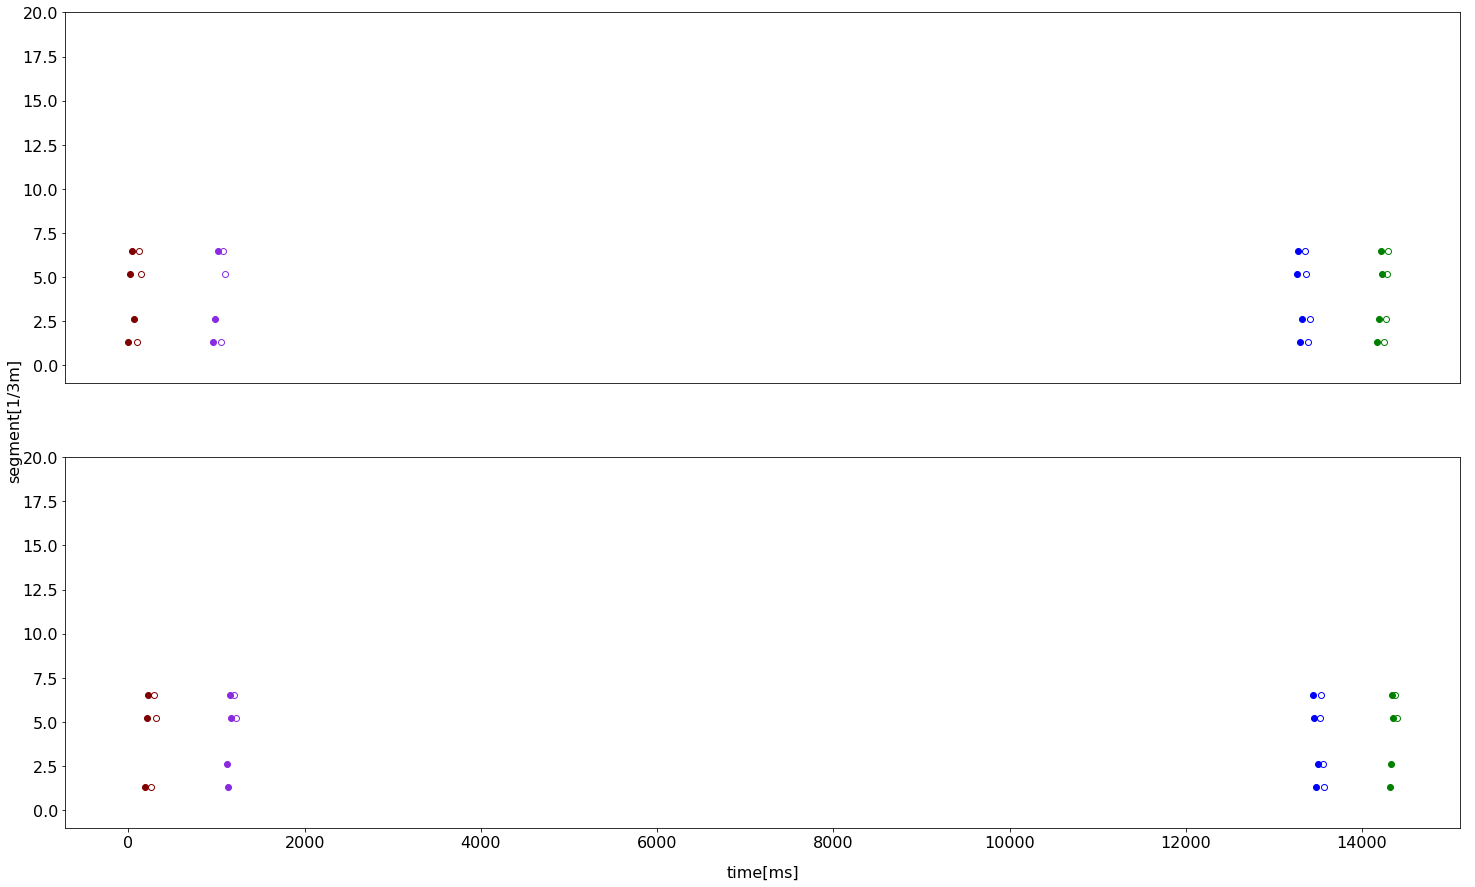

Found 2 clusters.


In [130]:
x_top, x_bottom = cl.seperate_stripes(x)
if x_top == []:
    x_data = cl.cluster_data(b, x_bottom)
elif x_bottom == []:
    x_data = cl.cluster_data(b, x_top)
else:
    x_data = np.concatenate((cl.cluster_data(b, x_top), cl.cluster_data(b, x_bottom)), axis = 0)

#### Vertical clusters merged for both drive throughs

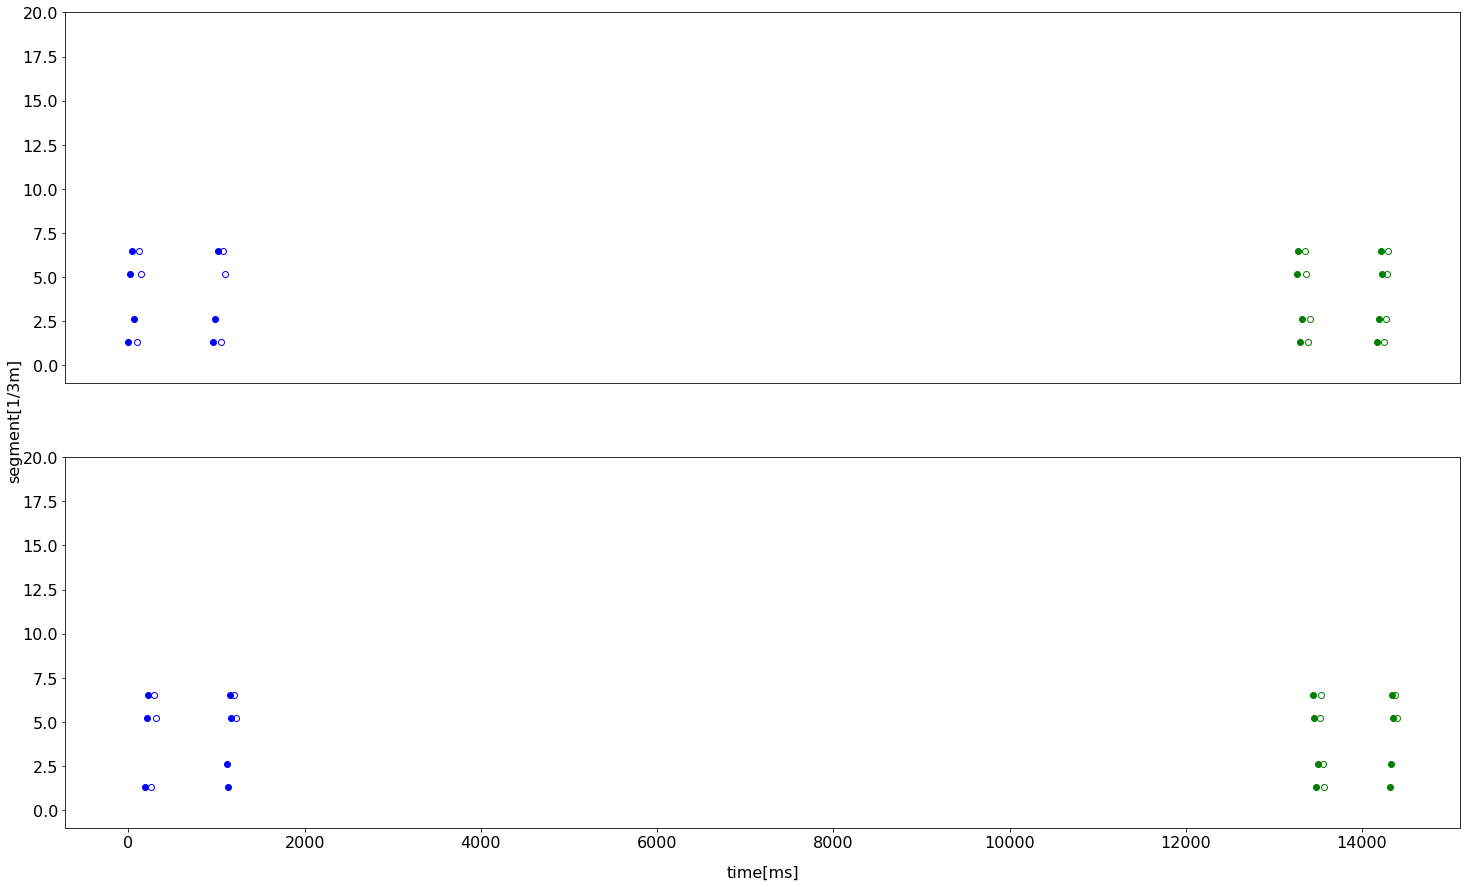

In [131]:
cl.plot_merged_clusters(x_data)

## Data preprocessing

The data is normalised on the x and y axes (tick values and segments) and padded with negative entries.

In [123]:
p_data = fit_input_data(normalise_data(x_data))
p_data.shape

(2, 61, 4)

## Car detection using CNN

The data is processed by a multi-class CNN model. It can be exchanged by setting the path of another keras model.

In [119]:
model = load_model('D:\\ParkHere\\Keras_models\\model_'+'multi_class'+'.h5')
layer_output = cl.binary_to_string(np.round(model.predict(p_data, verbose = 0)))
print('Output CNN: ',layer_output, ' True output: ', Y1_origin[sample])

Output CNN:  ['CAR_OUT', 'CAR_OUT']  True output:  CAR_OUT; CAR_OUT
